Section 3 figures:
- Eq 3.4: expected time of first decision vs size of clique for fixed theta
        variable: avgTime
- Eq 3.5: expected size of first wave vs size of clique for fixed theta
        variable: This will be wavesDec[3,1]/n. You'll need to process it a little
- Eq 3.2: expected size of first wave conditioned on T1 for fixed theta
        file: expecN10z1.mat


In [1]:
import os
print(os.getcwd())
import numpy as np
import scipy.special as sp
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import scipy.io as sio

C:\Users\Megan\Documents\Python Scripts\NMW Section 3


In [16]:
pi = np.pi

def nmw31(t,n = 10, th = 1.0):
    a = np.sqrt(t*4)
    b = sp.erf((th-t)/np.sqrt(t*4))
    time = (n)*((sp.erf((th-t)/a)+sp.erf(t/a))/(sp.erf((th-t)/a)+sp.erf((th+t)/a)))
    
    return time

def nmw32(t, n = 10, th = 1.0):
    a = np.sqrt(t/pi)
    b = -th**2/(4*t)
    x = ((n)/2)*(1+(a*(1-np.exp(b)))/(1-(2/th)*np.exp(b)*a*(1-1/(2*b))))
    return x

def nmw34(n, th = 0.1):
    t = th**2/(4*np.log(n))
    return t

def nmw35(n, th = 0.1):
    a = (n-1)/2*(1 + (th/np.sqrt(4*pi*np.log(n))))
    return a

sns.set()
sns.set(font_scale=1.2)
sns.set_style('ticks')
red_colors = sns.color_palette("Reds_d",9)
blue_colors = sns.color_palette("Blues_d",9)
orange_colors = sns.color_palette("YlOrBr_d",9)

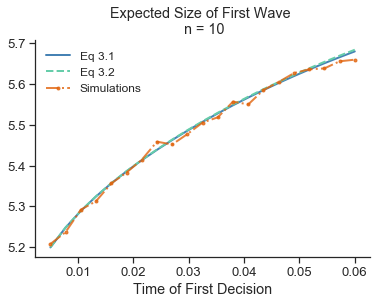

In [65]:
# Check for eq 3.2 and 3.1: E[a|T]

n = 21
current = sio.loadmat('expecN10z1.mat')
times = current['time']
exes = current['xMean']
t = []
x = []
for i in range(n):
    t.append(times.item(i))
    x.append(exes.item(i))

ex31 = [nmw31(tee) for tee in t]
ex32 = [nmw32(tee) for tee in t]

plt.plot(t,ex31, color = 'steelblue',lw = 2, alpha = 1, label = 'Eq 3.1')
plt.plot(t,ex32,  linestyle = '--',color = 'mediumaquamarine',lw=2,alpha=1,label='Eq 3.2')
plt.plot(t,x,marker = '.',linestyle='dashdot',color=orange_colors[4],lw=2,alpha=.8,label='Simulations')

plt.legend(fontsize=12,frameon=False)
plt.xlabel('Time of First Decision')
#plt.ylabel('Number of Agents')
plt.title('Expected Size of First Wave \n n = 10')

sns.despine()

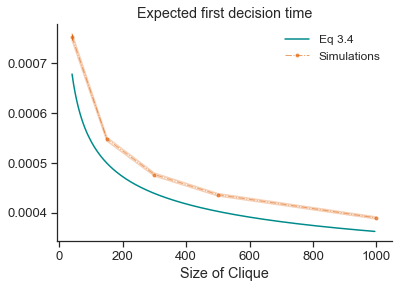

In [15]:
# Check for eq 3.4: expected time of first decision vs clique size

n_values = (40,150,300,500,1000)
t1 = [nmw34(n) for n in range(40,1000,5)]

str1 = 'z_0_1_Cooked_n'

t1File = []
t1CIlow = []
t1CIhigh = []

for n in n_values:
    lookupstr = str1 + str(n) +'.mat'
    current = sio.loadmat(lookupstr)
    time = current['avgTime']
    t1File.append(time[0])
    ci = current['FDTimeCI']
    t1CIlow.append(ci[0])
    t1CIhigh.append(ci[1])
    
plt.plot(range(40,1000,5),t1, color='darkcyan', lw=1.5, alpha=1, label = 'Eq 3.4') 
plt.plot(n_values,t1File, marker = '.',linestyle = 'dashdot',color=orange_colors[4], lw=1, alpha=.6,label = 'Simulations') 
plt.plot(n_values,t1CIlow, color = orange_colors[4], alpha = .3)
plt.plot(n_values,t1CIhigh, color = orange_colors[4], alpha = .3)
plt.fill_between(n_values[0],t1CIlow[0],t1CIhigh[0], color = orange_colors[4])

plt.legend(fontsize=12, frameon=False)
plt.xlabel('Size of Clique')
plt.title('Expected first decision time')

sns.despine()

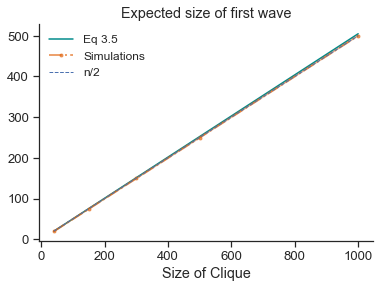

In [17]:
# Check for 3.5: Expected first wave size vs clique size

n_values = (40,150,300,500,1000)
f1 = [nmw35(n) for n in n_values]
halfsies = [n/2 for n in n_values]

str1 = 'z_0_1_Cooked_n'

f1File = []
f1CIlow = []
f1CIhigh = []

for n in n_values:
    lookupstr = str1 + str(n) +'.mat'
    current = sio.loadmat(lookupstr)
    waves = current['wavesDec']
    #print(waves)
    avgf1 = waves.item(0,2,0)
    f1File.append(avgf1)
    f1CIlow.append(waves.item(0,2,1))
    f1CIhigh.append(waves.item(0,2,2))
    
#print(f1File)
plt.plot(n_values,f1, color='darkcyan', lw=1.5, alpha=1, label = 'Eq 3.5') 
plt.plot(n_values,f1File, marker = '.',linestyle = 'dashdot',color=orange_colors[4], lw=2, alpha=.6,label = 'Simulations') 
plt.plot(n_values,f1CIlow,color=orange_colors[4],alpha = .3)
plt.plot(n_values,f1CIhigh,color=orange_colors[4],alpha=.3)
plt.plot(n_values,halfsies, linestyle = '--', lw = 1, label = 'n/2')

plt.legend(fontsize=12, frameon=False)
plt.xlabel('Size of Clique')
plt.title('Expected size of first wave')

sns.despine()